<h2 style="font-weight: bold">Store Sales TS Forecast</h2>

<h4>Emmm... wouldn't it be if we could use machine learning to predict grocery sales. So Yeah! you guess it! this notebook is going to be about the Store Sales TS Forecast Compeition 😄😄<br><br>I will be doing a EDA of review texts, some Visualization and Pre-Processing. and finally modelling <br></h4>

* <h5 style="font-weight: 700">Your feedback is very welcome</h5>
* <h5 style="font-weight: 700">If you find this notebook useful, please don't forget to upvote it!</h5>

In [1]:
# Required packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data
oil = pd.read_csv("../input/store-sales-time-series-forecasting/oil.csv")
holidays = pd.read_csv("../input/store-sales-time-series-forecasting/holidays_events.csv")
stores = pd.read_csv("../input/store-sales-time-series-forecasting/stores.csv")
train = pd.read_csv("../input/store-sales-time-series-forecasting/train.csv")
test = pd.read_csv("../input/store-sales-time-series-forecasting/test.csv")
transactions = pd.read_csv("../input/store-sales-time-series-forecasting/transactions.csv")
samp_subm = pd.read_csv("../input/store-sales-time-series-forecasting/sample_submission.csv")

#### **Getting to know the Data**

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0.0


In [4]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,20.0
1,3000889,2017-08-16,1,BABY CARE,1.0
2,3000890,2017-08-16,1,BEAUTY,8.0
3,3000891,2017-08-16,1,BEVERAGES,560.0
4,3000892,2017-08-16,1,BOOKS,1.0


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [7]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


#  **Exploratory Data Analysis**

In [9]:
# This function will do basic checks for Dataframes
def basic_eda(df):
    print("\n----------TOP 5 RECORDS--------\n")
    print(df.head(5))
    print("\n----------INFO-----------------\n")
    print(df.info())
    print("\n----------Describe-------------\n")
    print(df.describe())
    print("\n----------Columns--------------\n")
    print(df.columns)
    print("\n----------Data Types-----------\n")
    print(df.dtypes)
    print("\n-------Missing Values----------\n")
    print(df.isnull().sum())
    print("\n-------NULL values-------------\n")
    print(df.isna().sum())
    print("\n-----Shape Of Data-------------\n")
    print(df.shape)
    numeric_variables = df.select_dtypes(include=[np.number])
    categorical_variables = df.select_dtypes(exclude=[np.number])

    print('Numeric variables in the given the dataframe : ',numeric_variables.shape[1])
    print('Categorical variables in the givne the dataframe:',categorical_variables.shape[1])

In [10]:
#Litle bit of exploration of data

print("\n============================= oil =============================")
basic_eda(oil)


============================= oil =============================

----------TOP 5 RECORDS--------

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

----------Describe-------------

        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000

----------Columns--------------

Index(['date', 'dcoilwtico'], dtype='object')

----------Data Types-----------

date           object
dcoilwtico    float64
dtype: object

-----

In [11]:
print("\n============================= holidays =============================")
basic_eda(holidays)


============================= holidays =============================

----------TOP 5 RECORDS--------

         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale      

In [12]:
print("\n============================= Shops =============================")
basic_eda(stores)


============================= Shops =============================

----------TOP 5 RECORDS--------

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+

In [13]:
print("\n============================= train =============================")
basic_eda(train)


============================= train =============================

----------TOP 5 RECORDS--------

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0          0.0
1   1  2013-01-01          1   BABY CARE    0.0          0.0
2   2  2013-01-01          1      BEAUTY    0.0          0.0
3   3  2013-01-01          1   BEVERAGES    0.0          0.0
4   4  2013-01-01          1       BOOKS    0.0          0.0

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 137.4+ MB
None

----------Describe-------------

                 id     store_nbr         sales   onpromotion
count  3.00088

In [14]:
print("\n============================= test =============================")
basic_eda(test)


============================= test =============================

----------TOP 5 RECORDS--------

        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE         20.0
1  3000889  2017-08-16          1   BABY CARE          1.0
2  3000890  2017-08-16          1      BEAUTY          8.0
3  3000891  2017-08-16          1   BEVERAGES        560.0
4  3000892  2017-08-16          1       BOOKS          1.0

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           28512 non-null  int64  
 1   date         28512 non-null  object 
 2   store_nbr    28512 non-null  int64  
 3   family       28512 non-null  object 
 4   onpromotion  28512 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ MB
None

----------Describe-------------

         

In [15]:
print("\n============================= transactions =============================")
basic_eda(transactions )


============================= transactions =============================

----------TOP 5 RECORDS--------

         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922

----------INFO-----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None

----------Describe-------------

          store_nbr  transactions
count  83488.000000  83488.000000
mean      26.939237   1694.602158
std       15.608204    963.286644
min        1.000000      5.000000
25%       13.000000   1046.000000
50%       27.

In [16]:
# Let's check the store data
stores.type.value_counts()

D    18
C    15
A     9
B     8
E     4
Name: type, dtype: int64

In [17]:
stores.state.value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Manabi                             3
Azuay                              3
Los Rios                           2
El Oro                             2
Tungurahua                         2
Cotopaxi                           2
Loja                               1
Esmeraldas                         1
Pastaza                            1
Santa Elena                        1
Imbabura                           1
Bolivar                            1
Chimborazo                         1
Name: state, dtype: int64

In [18]:
stores.city.value_counts()

Quito            18
Guayaquil         8
Santo Domingo     3
Cuenca            3
Ambato            2
Machala           2
Latacunga         2
Manta             2
Libertad          1
Loja              1
Salinas           1
Cayambe           1
Riobamba          1
Puyo              1
Daule             1
Guaranda          1
Playas            1
Ibarra            1
Quevedo           1
Babahoyo          1
Esmeraldas        1
El Carmen         1
Name: city, dtype: int64

#### **Let's do some visualization**

Text(0, 0.5, 'Count')

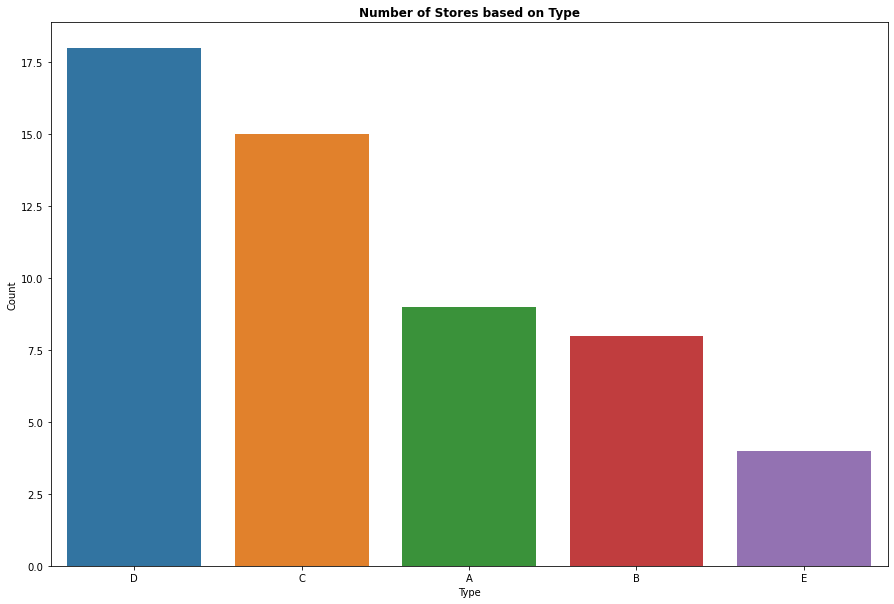

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, x='type', order=stores.type.value_counts().index)

plt.title('Number of Stores based on Type',fontweight="bold")
plt.xlabel('Type')
plt.ylabel('Count')

Text(0.5, 0, 'Count')

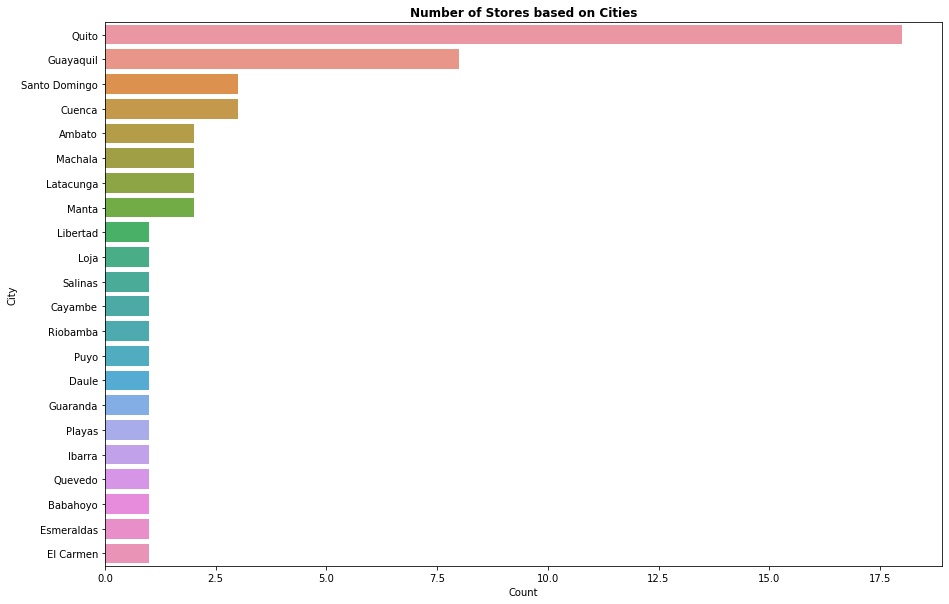

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(data=stores, y='city',order=stores.city.value_counts().index)

plt.title('Number of Stores based on Cities',fontweight="bold")
plt.ylabel('City')
plt.xlabel('Count')

Text(0, 0.5, 'the sales')

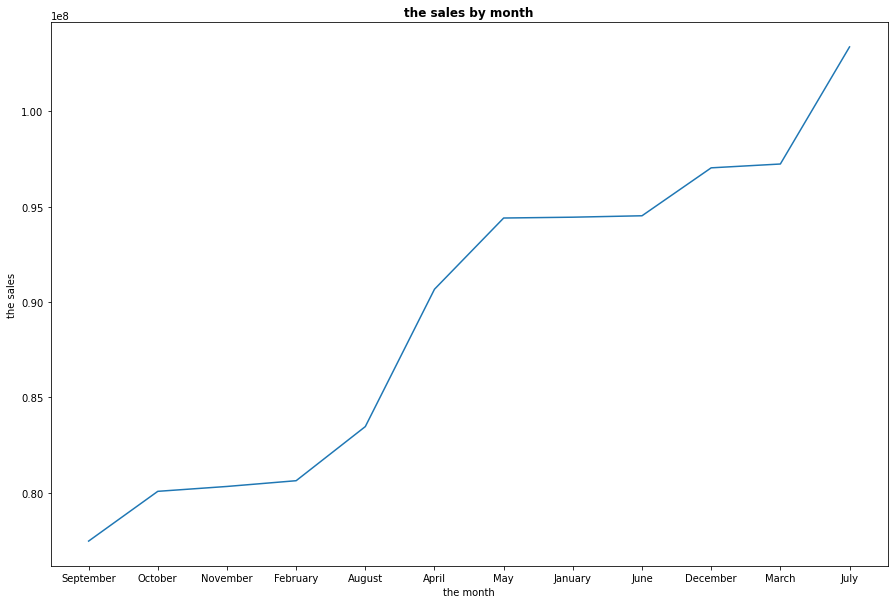

In [21]:
train.date = pd.to_datetime(train.date)
test.date = pd.to_datetime(test.date)
months_sales = train.groupby(train['date'].dt.strftime('%B'))['sales'].sum().sort_values()

plt.figure(figsize=(15,10))
plt.plot(months_sales)
plt.title("the sales by month", fontweight="bold")
plt.xlabel("the month")
plt.ylabel("the sales")

Text(0, 0.5, 'the sales')

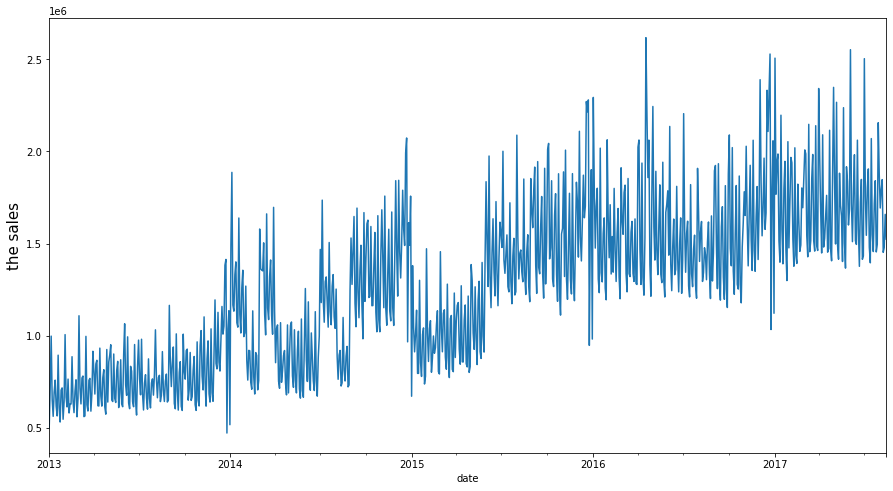

In [22]:
plt.figure(figsize=(15,8))
train.groupby(pd.Grouper(key='date', freq='2D')).sum()['sales'].plot()
plt.ylabel("the sales", fontsize=15)

Text(0, 0.5, 'the sales')

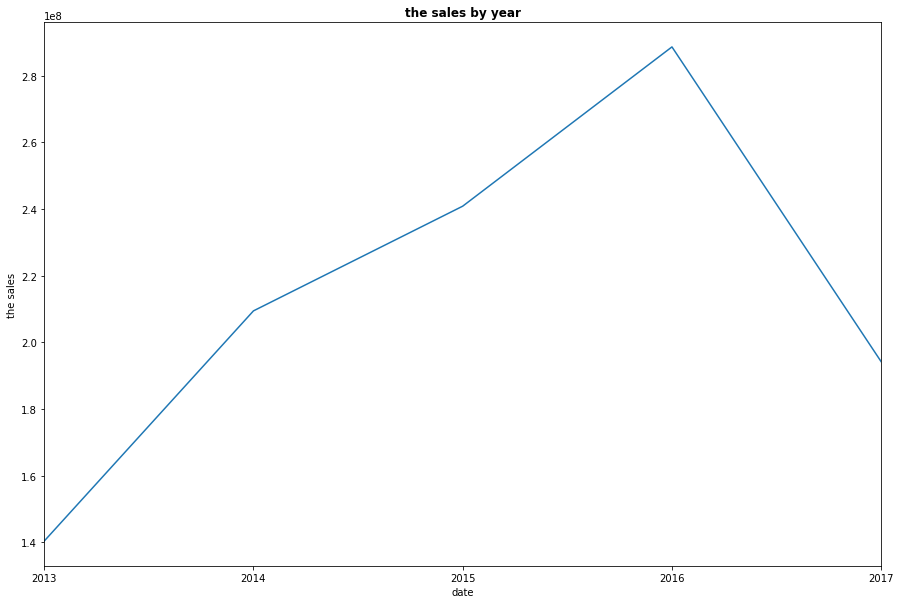

In [23]:
plt.figure(figsize=(15,10))
train.groupby(pd.Grouper(key='date', freq='1Y')).sum()['sales'].plot()
plt.title("the sales by year", fontweight="bold")
plt.ylabel("the sales")

#  **Pre-processing & Feature Engineering**

In [24]:
# some Features
features = ['store_nbr', 'family', 'onpromotion']
target = 'sales'

In [25]:
# creating the features weekday, month or year.
def extract_weekday(df):
    return df.dayofweek

def extract_month(df):
    return df.month

def extract_year(df):
    return df.year

In [26]:
train['weekday'] = train['date'].apply(extract_weekday)
train['year'] = train['date'].apply(extract_year)
train['month'] = train['date'].apply(extract_month)

test['weekday'] = test['date'].apply(extract_weekday)
test['year'] = test['date'].apply(extract_year)
test['month'] = test['date'].apply(extract_month)

In [27]:
features.append('weekday')
features.append('year')
features.append('month')

#### **Encode Labels**

In [28]:
store_sales = pd.read_csv(
    '../input/store-sales-time-series-forecasting/train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()


df_test = pd.read_csv(
    '../input/store-sales-time-series-forecasting/test.csv',
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_test['date'] = df_test.date.dt.to_period('D')
df_test = df_test.set_index(['store_nbr', 'family', 'date']).sort_index()

In [29]:
# Target
y = store_sales.unstack(['store_nbr', 'family']).loc["2017"]
y

sales                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2017-01-02        5.0       0.0    0.0    1434.0   0.0   166.819000   
2017-01-03        4.0       0.0    4.0    3081.0   2.0   519.348022   
2017-01-04        1.0       0.0    4.0    3039.0   2.0   543.250977   
2017-01-05        2.0       0.0    3.0    2617.0   0.0   533.479980   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

                                                     ...            \
store_nbr                                            ...         9   
family     CELEBRATION CLEANING   DAIRY        DELI  ... MAGAZINES   
date                                                 ...             
2017-01-01         0.0      0.0     0.0    0.000000  ...       0.0   
2017-01-02         0.0    332.0   376.0   44.980000  ...       5.0   
2017-01-03        15.0    952.0  1045.0  209.300003  ...       2.0   
2017-01-04        17.0   1055.0  1029.0  135.944000  ...       3.0   
2017-01-05        40.0    918.0   853.0  137.005997  ...       2.0   
...                ...      ...     ...         ...  ...       ...   
2017-08-11         4.0    341.0   343.0   64.302002  ...       5.0   
2017-08-12         3.0    351.0   526.0   99.487999  ...       2.0   
2017-08-13         1.0    169.0   266.0   47.770000  ...       3.0   
2017-08-14         4.0    571.0   699.0  154.578003  ...      12.0   
2017-08-15        21.0    703.0   602.0  116.402000  ...      11.0   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01    0.000000           0.0          0.0                     0.0   
2017-01-02  659.570007        1243.0         11.0                    41.0   
2017-01-03  547.364014         876.0          6.0                    15.0   
2017-01-04  395.287994         677.0          6.0                    13.0   
2017-01-05  470.768005         604.0          7.0                    10.0   
...                ...           ...          ...                     ...   
2017-08-11  309.244995         373.0         11.0                     2.0   
2017-08-12  260.298004         400.0          7.0                    10.0   
2017-08-13  327.205994         510.0          2.0                     9.0   
2017-08-14  330.975006         445.0          2.0                    14.0   
2017-08-15  449.227997         522.0          6.0                     6.0   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01    0.000000       0.000000     0.000000                        0.0   
2017-01-02  843.596008     115.188995  3136.895996                        1.0   
2017-01-03  714.659973     133.039001  3229.558105                        1.0   
2017-01-04  536.830017      75.201004  1491.416992                        7.0   
2017-01-05  414.100006     113.698997  1566.821045                        1.0   
...           

#### **Create training data**

In [30]:
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X['NewYear'] = (X.index.dayofyear == 1)

#  **Modeling**

In [31]:
# Linear Regression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

In [32]:
X_test = dp.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)

#### **Submission**

In [33]:
y_submit = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)
y_submit = y_submit.stack(['store_nbr', 'family'])
y_submit = y_submit.join(df_test.id).reindex(columns=['id', 'sales'])
y_submit.to_csv('./output/Submission.csv', index=False)

#### **Credit**
https://www.kaggle.com/dkomyagin/simple-ts-ridge-rf